# GROUP 2 - dataset 2

Members: 
Trần Thanh Duy Linh
Vũ Phạm Thảo Vy
Lê Đức Huy
Nguyễn Thị Hồng Nhi

# IMPORT DATA

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# LOAD DATA

In [2]:
# Change working directory to dataset folder
os.chdir("E:/huy/data") 
os.getcwd()
os.listdir()

['diabetic_data.csv',
 'huy_data.csv',
 'IDs_mapping.csv',
 'linh_data.csv',
 'Preprocesingda_vyvu.csv',
 'preprocessed_data.csv',
 'test.csv',
 'vy_data.csv']

In [3]:
df = pd.read_csv('preprocessed_data.csv')
df.tail()

,Unnamed: 0,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
101758,101761,100162476,AfricanAmerican,Male,[70-80),1,3,7,3,51,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101759,101762,74694222,AfricanAmerican,Female,[80-90),1,4,5,5,33,...,No,Steady,No,No,No,No,No,No,Yes,NO
101760,101763,41088789,Caucasian,Male,[70-80),1,1,7,1,53,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101761,101764,31693671,Caucasian,Female,[80-90),2,3,7,10,45,...,No,Up,No,No,No,No,No,Ch,Yes,NO
101762,101765,175429310,Caucasian,Male,[70-80),1,1,7,6,13,...,No,No,No,No,No,No,No,No,No,NO


In [4]:
df.info() # admission_type_id , discharge_disposition_id, admission_source_id

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 44 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   Unnamed: 0                101763 non-null  int64 
 1   patient_nbr               101763 non-null  int64 
 2   race                      101763 non-null  object
 3   gender                    101763 non-null  object
 4   age                       101763 non-null  object
 5   admission_type_id         101763 non-null  int64 
 6   discharge_disposition_id  101763 non-null  int64 
 7   admission_source_id       101763 non-null  int64 
 8   time_in_hospital          101763 non-null  int64 
 9   num_lab_procedures        101763 non-null  int64 
 10  num_procedures            101763 non-null  int64 
 11  num_medications           101763 non-null  int64 
 12  number_outpatient         101763 non-null  int64 
 13  number_emergency          101763 non-null  int64 
 14  numb

# RECODE DISCHARGE TYPE, ADMISSION TYPE, ADMISSION SOURCES

In [5]:
def admis_type(adtype):
    if adtype == 7:
        return 4
    elif adtype ==6:
        return 5
    elif adtype == 8:
            return 5
    else:
        return adtype

df['admission_type'] = df['admission_type_id'].apply(admis_type)


df['admission_type'] = np.where(df['admission_type'] == 5, 'NaN', df['admission_type'])
df.head()


df['admission_type'].value_counts()

1      53988
3      18868
2      18480
NaN    10396
4         31
Name: admission_type, dtype: int64

In [6]:
def discharge(dis):
    if (dis == 5) or (dis == 9 ) :
        return 4
    elif (dis ==6) or (dis == 8) :
            return 5
    elif (dis == 10) or (dis ==12 ) or (dis == 15) or (dis == 16) or (dis == 17) or (dis == 22) or (dis ==23 ) or (dis ==24 ) or (dis == 27) or (dis ==28 ) :
            return 6
    elif (dis == 11) or (dis == 13) or (dis == 14) or (dis == 19) or (dis == 20) or (dis == 21) :
            dis = 7
    elif (dis == 18 ) or (dis == 25 ) or (dis == 26) or (dis == 30):
            return 8
    else:
        return dis

df['discharge_type'] = df['discharge_disposition_id'].apply(discharge)
df['discharge_type'] = np.where(df['discharge_type'] == 8, 'NaN', df['discharge_type'])
df['discharge_type'] = np.where(df['discharge_type'] == 'nan', 'NaN', df['discharge_type'])    



df['discharge_type'].value_counts()

1.0    60232
3.0    13954
5.0    13010
NaN     7103
6.0     2693
2.0     2128
4.0     2020
7.0      623
Name: discharge_type, dtype: int64

In [7]:
def admis_source (adm):
    if (adm == 1) or (adm == 1 ) :
        return 1
    if (adm == 3)  :
        return 2
    if (adm == 4) or (adm == 10 ) or (adm == 22)  :
        return 3
    if (adm == 5) :
        return 4
    if (adm == 6) :
        return 5
    if (adm == 7) :
        return 6
    if (adm == 8) or (adm == 11 ) or (adm == 13)  or (adm == 14)   or (adm == 25) :
        return 6
    elif (adm ==9) or (adm ==17) or (adm == 20):
            return 7
    else:
        return adm
df['admission_source'] = df['admission_source_id'].apply(admis_source) 

df['admission_source'] = np.where(df['admission_source'] == 7, 'NaN', df['admission_source'])
    
df['admission_source'].value_counts()

6      57515
1      29564
NaN     7067
3       3207
5       2264
2       1291
4        855
Name: admission_source, dtype: int64

In [8]:
# Delete the missing data of admission_type, discharge_type, admission_source

df = df[df.admission_type != 'NaN']
df = df[df.discharge_type != '7.0'] # hospice
df = df[df.discharge_type != 'NaN']
df = df[df.admission_source != 'NaN']

In [9]:
df['admission_source'].value_counts()

6    51572
1    25721
3     2606
5     2188
2     1036
4      692
Name: admission_source, dtype: int64

# CHISQUARE TEST: Age, Sex, race, admission_source, admission_type,  discharge_type

In [10]:
import pandas as pd
from scipy import stats
from scipy.stats import chi2_contingency


In [11]:
# Race and gender
race_gender = pd.crosstab(
    df['race'],
    df['gender'],
    margins = False)
stat, pvalue, _, _ = chi2_contingency(race_gender)
print('stat=%.3f, p-value=%.3f' % (stat, pvalue))

stat=476.434, p-value=0.000


In [12]:
# Race and age
race_age = pd.crosstab(
    df['race'],
    df['age'],
    margins = False)
stat, pvalue, _, _ = chi2_contingency(race_age)
print('stat=%.3f, p-value=%.3f' % (stat, pvalue))

stat=3096.138, p-value=0.000


In [13]:
# Race and discharge_type
race_dis = pd.crosstab(
    df['race'],
    df['discharge_type'],
    margins = False)
stat, pvalue, _, _ = chi2_contingency(race_dis)
print('stat=%.3f, p-value=%.3f' % (stat, pvalue))

stat=723.095, p-value=0.000


# BUILD LOGISTIC REGRESSION MODEL

### UNIVARIATE LOGISTIC REGRESSION

In [14]:
df['readmitted'].value_counts()  # recode the outcome variables

NO     44398
>30    29878
<30     9539
Name: readmitted, dtype: int64

In [15]:
# Recode the readmission: 0 - readmission <30 days, 1 - readmission > 30 days OR No readmission
def readmit(red):
    if red != '<30':
        return 0
    else:
        return 1
df['readmit_num']= df['readmitted'].apply(readmit)
df['readmit_num'].value_counts()
    

0    74276
1     9539
Name: readmit_num, dtype: int64

In [16]:
import pandas as pd
import statsmodels.formula.api as smf
import patsy

In [17]:
log_reg = smf.logit("readmit_num ~ race", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354250
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Pseudo R-squared:   0.000     
Dependent Variable:    readmit_num        AIC:                59394.8528
Date:                  2022-01-15 02:34   BIC:                59450.8710
No. Observations:      83815              Log-Likelihood:     -29691.   
Df Model:              5                  LL-Null:            -29705.   
Df Residuals:          83809              LLR p-value:        6.9338e-05
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        6.0000                                           
------------------------------------------------------------------------
                         Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               -2.3613   0.0798 -29.6037 0.0000 -2.5176 -2.2050
race[T.AfricanAmerican]  0.3011   0.0835   3.6077 0.0003  0.1375  0.4647
race[T.Asian]            0.2355   0.1602   1.4703 0.1415 -0.0784  0.5495
race[T.Caucasian]        0.3274   0.0807   4.0552 0.0001  0.1692  0.4857
race[T.Hispanic]         0.1476   0.1179   1.2513 0.2108 -0.0836  0.3787
race[T.Other]            0.1193   0.1251   0.9536 0.3403 -0.1259  0.3646
========================================================================

"""

In [18]:
log_reg = smf.logit("readmit_num ~ gender", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354406
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: readmit_num      AIC:              59413.0123
Date:               2022-01-15 02:34 BIC:              59431.6850
No. Observations:   83815            Log-Likelihood:   -29705.   
Df Model:           1                LL-Null:          -29705.   
Df Residuals:       83813            LLR p-value:      0.52463   
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept       -2.0460   0.0148 -138.6550 0.0000 -2.0750 -2.0171
gender[T.Male]  -0.0139   0.0218   -0.6361 0.5247 -0.0567  0.0289
=================================================================

"""

In [19]:
df['age'].value_counts()

[70-80)     21033
[60-70)     18824
[50-60)     14435
[80-90)     13994
[40-50)      7966
[30-40)      3157
[90-100)     2219
[20-30)      1420
[10-20)       622
[0-10)        145
Name: age, dtype: int64

In [20]:
log_reg = smf.logit("readmit_num ~ age", data=df).fit() 
log_reg.summary2()
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.353548
         Iterations 8
                        OR  Lower CI   Upper CI
Intercept         0.013986  0.003464   0.056465
age[T.[10-20)]    4.522222  1.077277  18.983507
age[T.[20-30)]   11.789582  2.897072  47.977481
age[T.[30-40)]    8.943870  2.205605  36.267966
age[T.[40-50)]    8.405864  2.078265  33.998814
age[T.[50-60)]    7.612563  1.883520  30.767461
age[T.[60-70)]    9.064827  2.243659  36.623700
age[T.[70-80)]    9.886487  2.447321  39.938616
age[T.[80-90)]   10.433426  2.582010  42.159552
age[T.[90-100)]   9.738351  2.398020  39.547407


In [21]:
log_reg = smf.logit("readmit_num ~ admission_type", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354236
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.000     
Dependent Variable:   readmit_num       AIC:               59388.5517
Date:                 2022-01-15 02:34  BIC:               59425.8972
No. Observations:     83815             Log-Likelihood:    -29690.   
Df Model:             3                 LL-Null:           -29705.   
Df Residuals:         83811             LLR p-value:       2.3902e-06
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       7.0000                                         
---------------------------------------------------------------------
                     Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------
Intercept           -2.0133   0.0140 -143.9284 0.0000 -2.0407 -1.9859
admission_type[T.2] -0.0476   0.0280   -1.7011 0.0889 -0.1024  0.0072
admission_type[T.3] -0.1448   0.0284   -5.0942 0.0000 -0.2005 -0.0891
admission_type[T.4] -1.2825   1.0184   -1.2593 0.2079 -3.2786  0.7136
=====================================================================

"""

In [22]:
log_reg = smf.logit("readmit_num ~ discharge_type", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.349166
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                 Logit             Pseudo R-squared:  0.015      
Dependent Variable:    readmit_num       AIC:               58542.6431 
Date:                  2022-01-15 02:34  BIC:               58598.6613 
No. Observations:      83815             Log-Likelihood:    -29265.    
Df Model:              5                 LL-Null:           -29705.    
Df Residuals:          83809             LLR p-value:       1.0442e-187
Converged:             1.0000            Scale:             1.0000     
No. Iterations:        6.0000                                          
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept             -2.2723   0.0147 -154.4951 0.0000 -2.3012 -2.2435
discharge_type[T.2.0]  0.6896   0.0640   10.7803 0.0000  0.5642  0.8150
discharge_type[T.3.0]  0.5104   0.0299   17.0710 0.0000  0.4518  0.5690
discharge_type[T.4.0]  0.7129   0.0632   11.2740 0.0000  0.5889  0.8368
discharge_type[T.5.0]  0.3453   0.0319   10.8251 0.0000  0.2828  0.4078
discharge_type[T.6.0]  1.2119   0.0478   25.3382 0.0000  1.1181  1.3056
=======================================================================

"""

In [23]:
log_reg = smf.logit("readmit_num ~ admission_source", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354160
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.001     
Dependent Variable:   readmit_num        AIC:                59379.8579
Date:                 2022-01-15 02:34   BIC:                59435.8761
No. Observations:     83815              Log-Likelihood:     -29684.   
Df Model:             5                  LL-Null:            -29705.   
Df Residuals:         83809              LLR p-value:        7.2329e-08
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                       Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept             -2.1149   0.0201 -105.1288 0.0000 -2.1543 -2.0755
admission_source[T.2]  0.0344   0.1009    0.3408 0.7333 -0.1634  0.2322
admission_source[T.3] -0.1372   0.0697   -1.9681 0.0491 -0.2739 -0.0006
admission_source[T.4]  0.1756   0.1164    1.5084 0.1314 -0.0526  0.4038
admission_source[T.5] -0.1598   0.0762   -2.0968 0.0360 -0.3092 -0.0104
admission_source[T.6]  0.1091   0.0243    4.4900 0.0000  0.0615  0.1567
=======================================================================

"""

In [24]:
log_reg = smf.logit("readmit_num ~ time_in_hospital", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.353374
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.003     
Dependent Variable:  readmit_num      AIC:              59240.1529
Date:                2022-01-15 02:34 BIC:              59258.8256
No. Observations:    83815            Log-Likelihood:   -29618.   
Df Model:            1                LL-Null:          -29705.   
Df Residuals:        83813            LLR p-value:      1.4331e-39
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept        -2.2636   0.0196 -115.2688 0.0000 -2.3021 -2.2251
time_in_hospital  0.0466   0.0035   13.3941 0.0000  0.0398  0.0534
==================================================================

"""

In [25]:
log_reg = smf.logit("readmit_num ~ num_lab_procedures", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354085
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.001     
Dependent Variable:   readmit_num      AIC:              59359.1865
Date:                 2022-01-15 02:34 BIC:              59377.8592
No. Observations:     83815            Log-Likelihood:   -29678.   
Df Model:             1                LL-Null:          -29705.   
Df Residuals:         83813            LLR p-value:      1.7829e-13
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -2.2365   0.0277 -80.8451 0.0000 -2.2907 -2.1822
num_lab_procedures  0.0042   0.0006   7.3346 0.0000  0.0031  0.0053
===================================================================

"""

In [26]:
log_reg = smf.logit("readmit_num ~ num_procedures", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354331
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: readmit_num      AIC:              59400.5417
Date:               2022-01-15 02:34 BIC:              59419.2144
No. Observations:   83815            Log-Likelihood:   -29698.   
Df Model:           1                LL-Null:          -29705.   
Df Residuals:       83813            LLR p-value:      0.00033294
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                 Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept       -2.0220   0.0137 -147.4445 0.0000 -2.0489 -1.9952
num_procedures  -0.0231   0.0065   -3.5632 0.0004 -0.0359 -0.0104
=================================================================

"""

In [27]:
log_reg = smf.logit("readmit_num ~ num_medications", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.353581
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.002     
Dependent Variable: readmit_num      AIC:              59274.7724
Date:               2022-01-15 02:34 BIC:              59293.4451
No. Observations:   83815            Log-Likelihood:   -29635.   
Df Model:           1                LL-Null:          -29705.   
Df Residuals:       83813            LLR p-value:      5.2675e-32
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -2.3007   0.0238 -96.5945 0.0000 -2.3474 -2.2540
num_medications   0.0152   0.0013  12.0076 0.0000  0.0127  0.0176
=================================================================

"""

In [28]:
log_reg = smf.logit("readmit_num ~number_outpatient", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354231
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.000     
Dependent Variable:   readmit_num      AIC:              59383.7651
Date:                 2022-01-15 02:34 BIC:              59402.4379
No. Observations:     83815            Log-Likelihood:   -29690.   
Df Model:             1                LL-Null:          -29705.   
Df Residuals:         83813            LLR p-value:      5.1701e-08
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                   Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept         -2.0684   0.0113 -183.2658 0.0000 -2.0906 -2.0463
number_outpatient  0.0421   0.0074    5.7248 0.0000  0.0277  0.0566
===================================================================

"""

In [29]:
log_reg = smf.logit("readmit_num ~number_emergency", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.353101
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.004     
Dependent Variable:  readmit_num      AIC:              59194.3920
Date:                2022-01-15 02:34 BIC:              59213.0648
No. Observations:    83815            Log-Likelihood:   -29595.   
Df Model:            1                LL-Null:          -29705.   
Df Residuals:        83813            LLR p-value:      1.4759e-49
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept        -2.0874   0.0112 -185.8094 0.0000 -2.1095 -2.0654
number_emergency  0.1443   0.0100   14.3802 0.0000  0.1246  0.1639
==================================================================

"""

In [30]:
log_reg = smf.logit("readmit_num ~ number_inpatient", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.343956
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.029     
Dependent Variable:  readmit_num      AIC:              57661.2968
Date:                2022-01-15 02:34 BIC:              57679.9696
No. Observations:    83815            Log-Likelihood:   -28829.   
Df Model:            1                LL-Null:          -29705.   
Df Residuals:        83813            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                  Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept        -2.2885   0.0128 -178.2517 0.0000 -2.3137 -2.2634
number_inpatient  0.2868   0.0067   43.0298 0.0000  0.2737  0.2998
==================================================================

"""

In [31]:
log_reg = smf.logit("readmit_num ~ diabetesMed ", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.354054
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
===================================================================
Model:                Logit            Pseudo R-squared: 0.001     
Dependent Variable:   readmit_num      AIC:              59353.9914
Date:                 2022-01-15 02:34 BIC:              59372.6641
No. Observations:     83815            Log-Likelihood:   -29675.   
Df Model:             1                LL-Null:          -29705.   
Df Residuals:         83813            LLR p-value:      1.2700e-14
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       6.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Intercept          -2.2178   0.0247 -89.7526 0.0000 -2.2662 -2.1694
diabetesMed[T.Yes]  0.2086   0.0275   7.5807 0.0000  0.1547  0.2626
===================================================================

"""

In [32]:
log_reg = smf.logit("readmit_num ~ number_diagnoses", data=df).fit() 
log_reg.summary2()

Optimization terminated successfully.
         Current function value: 0.352853
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.004     
Dependent Variable: readmit_num      AIC:              59152.8247
Date:               2022-01-15 02:34 BIC:              59171.4974
No. Observations:   83815            Log-Likelihood:   -29574.   
Df Model:           1                LL-Null:          -29705.   
Df Residuals:       83813            LLR p-value:      1.2747e-58
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept        -2.7800   0.0483 -57.5564 0.0000 -2.8747 -2.6853
number_diagnoses  0.0956   0.0061  15.7219 0.0000  0.0836  0.1075
=================================================================

"""

In [33]:
log_reg = smf.logit("readmit_num ~ max_glu_serum ", data=df).fit() 
log_reg.summary2()

         Current function value: 0.354344
         Iterations: 35


C:\Users\frans\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.000     
Dependent Variable:       readmit_num          AIC:                  59406.7408
Date:                     2022-01-15 02:34     BIC:                  59444.0862
No. Observations:         83815                Log-Likelihood:       -29699.   
Df Model:                 3                    LL-Null:              -29705.   
Df Residuals:             83811                LLR p-value:          0.013612  
Converged:                0.0000               Scale:                1.0000    
No. Iterations:           35.0000                                              
-------------------------------------------------------------------------------
                       Coef.    Std.Err.     z    P>|z|     [0.025     0.975]  
-------------------------------------------------------------------------------
Intercept             -21.5163 17712.8920 -0.0012 0.9990 -34738.1466 34695.1140
max_glu_serum[T.>300]  19.9617 17712.8920  0.0011 0.9991 -34696.6687 34736.5920
max_glu_serum[T.None]  19.4619 17712.8920  0.0011 0.9991 -34697.1684 34736.0922
max_glu_serum[T.Norm]  19.8246 17712.8920  0.0011 0.9991 -34696.8057 34736.4550
===============================================================================

"""

In [34]:
df.groupby('A1Cresult').size()

A1Cresult
>7       3242
>8       6798
None    69350
Norm     4425
dtype: int64

In [35]:

log_reg = smf.logit("readmit_num ~ C(A1Cresult, Treatment(reference= 1)) ", data=df).fit() 
log_reg.summary2()
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)



Optimization terminated successfully.
         Current function value: 0.354119
         Iterations 6
                                                    OR  Lower CI  Upper CI
Intercept                                     0.106625  0.098372  0.115571
C(A1Cresult, Treatment(reference=1))[T.>7]    1.066412  0.927707  1.225855
C(A1Cresult, Treatment(reference=1))[T.None]  1.245132  1.145021  1.353996
C(A1Cresult, Treatment(reference=1))[T.Norm]  0.996479  0.876396  1.133016


# Develop the Final model 

In [36]:

log_reg = smf.logit("readmit_num ~ number_inpatient + discharge_type  + number_diagnoses + number_emergency + diabetesMed + num_lab_procedures + age + A1Cresult + num_procedures + admission_type ", data=df).fit()
log_reg.summary2()
odds_ratios = pd.DataFrame(
    {
        "OR": log_reg.params,
        "Lower CI": log_reg.conf_int()[0],
        "Upper CI": log_reg.conf_int()[1],
    }
)
odds_ratios = np.exp(odds_ratios)
print(odds_ratios)

Optimization terminated successfully.
         Current function value: 0.337853
         Iterations 8
                             OR  Lower CI   Upper CI
Intercept              0.009144  0.002247   0.037217
discharge_type[T.2.0]  1.926878  1.695775   2.189477
discharge_type[T.3.0]  1.488684  1.396115   1.587391
discharge_type[T.4.0]  1.993153  1.755484   2.262999
discharge_type[T.5.0]  1.232312  1.154380   1.315506
discharge_type[T.6.0]  3.270307  2.969266   3.601870
diabetesMed[T.Yes]     1.194523  1.130241   1.262460
age[T.[10-20)]         3.427876  0.815340  14.411574
age[T.[20-30)]         5.712172  1.399350  23.317182
age[T.[30-40)]         5.232768  1.287815  21.262264
age[T.[40-50)]         4.797016  1.183528  19.443025
age[T.[50-60)]         4.329089  1.068716  17.536009
age[T.[60-70)]         5.007310  1.236390  20.279317
age[T.[70-80)]         5.153770  1.272540  20.872693
age[T.[80-90)]         5.015413  1.237794  20.321928
age[T.[90-100)]        4.487722  1.101790  18.2790

In [52]:
odds_ratios.to_csv('test.csv')

# Plot the logistic regression model result

In [53]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import zepid
from zepid.graphics import EffectMeasurePlot

In [73]:
odds_ratios=pd.read_csv('test.csv') 

In [74]:
odds_ratios

,Var,OR,Lower CI,Upper CI
0,Intercept,0.009144,0.002247,0.037217
1,discharge_type[T.2.0],1.926878,1.695775,2.189477
2,discharge_type[T.3.0],1.488684,1.396115,1.587391
3,discharge_type[T.4.0],1.993153,1.755484,2.262999
4,discharge_type[T.5.0],1.232312,1.154380,1.315506
5,discharge_type[T.6.0],3.270307,2.969266,3.601870
6,diabetesMed[T.Yes],1.194523,1.130241,1.262460
7,age[T.[10-20)],3.427876,0.815340,14.411574
8,age[T.[20-30)],5.712172,1.399350,23.317182
9,age[T.[30-40)],5.232768,1.287815,21.262264


In [70]:
#Name of variables
var_name = odds_ratios["Var"].to_numpy()
print(var_name)
##OR
or_array = odds_ratios["OR"].to_numpy()
print(or_array)
##lower CI
lowCI_array = odds_ratios["Lower CI"].to_numpy()
print(lowCI_array)
##upper CI
upCI_array = odds_ratios["Upper CI"].to_numpy()
print(upCI_array)

['Intercept' 'discharge_type[T.2.0]' 'discharge_type[T.3.0]'
 'discharge_type[T.4.0]' 'discharge_type[T.5.0]' 'discharge_type[T.6.0]'
 'diabetesMed[T.Yes]' 'age[T.[10-20)]' 'age[T.[20-30)]' 'age[T.[30-40)]'
 'age[T.[40-50)]' 'age[T.[50-60)]' 'age[T.[60-70)]' 'age[T.[70-80)]'
 'age[T.[80-90)]' 'age[T.[90-100)]' 'A1Cresult[T.>8]' 'A1Cresult[T.None]'
 'A1Cresult[T.Norm]' 'admission_type[T.2]' 'admission_type[T.3]'
 'admission_type[T.4]' 'number_inpatient' 'number_diagnoses'
 'number_emergency' 'num_lab_procedures' 'num_procedures']
[0.009144   1.92687838 1.48868434 1.99315308 1.23231239 3.27030746
 1.19452253 3.42787627 5.7121716  5.23276774 4.79701575 4.32908943
 5.00730972 5.15376996 5.01541273 4.48772231 0.98328406 1.13272881
 0.96841413 0.98771291 0.94632173 0.3129393  1.30754866 1.04411401
 1.03148209 1.00204518 0.99640142]
[2.24665900e-03 1.69577489e+00 1.39611532e+00 1.75548397e+00
 1.15438001e+00 2.96926581e+00 1.13024135e+00 8.15340197e-01
 1.39935023e+00 1.28781480e+00 1.1835277

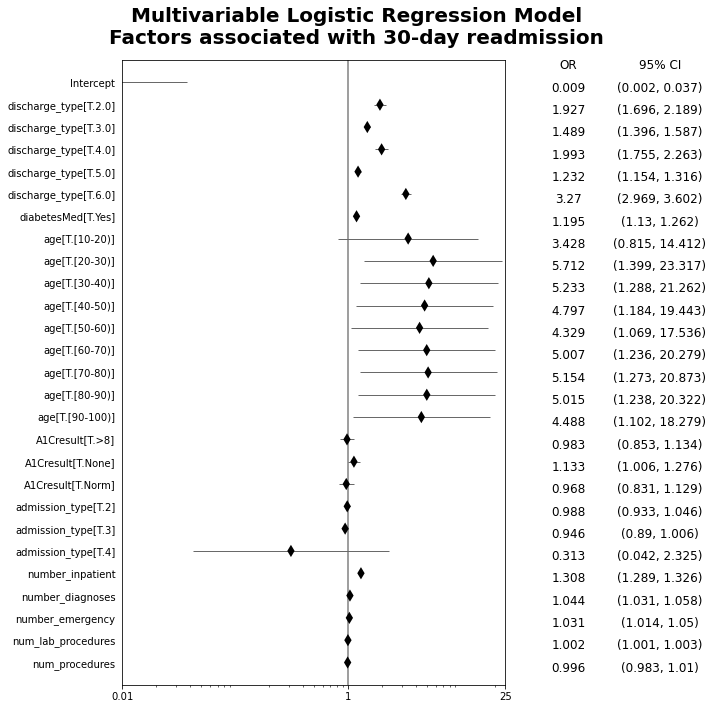

In [71]:
#Categorical plot

p_cate = EffectMeasurePlot(label=var_name, effect_measure=or_array, lcl=lowCI_array, ucl=upCI_array)
p_cate.labels(scale='log')
p_cate.plot(figsize=(10,10), t_adjuster=0.009, max_value=25, min_value=0.01)
plt.suptitle("Multivariable Logistic Regression Model\n Factors associated with 30-day readmission ",x=0.5,y=0.98, fontsize = 20, weight = 'bold')
plt.tight_layout()
plt.rc('axes', labelsize=30)
plt.show()

### Factors associated with 30-day readmission
Discharge type, using the diabetes medicine, age, A1C results, admission type, no. inpatients, no.diagnosis, no.emergency, no lab procedure


# Numeric variable group

In [75]:
numeric = odds_ratios[22:36]
print(numeric)

                   Var        OR  Lower CI  Upper CI
22    number_inpatient  1.307549  1.289476  1.325875
23    number_diagnoses  1.044114  1.030665  1.057739
24    number_emergency  1.031482  1.013724  1.049552
25  num_lab_procedures  1.002045  1.000813  1.003279
26      num_procedures  0.996401  0.982769  1.010223


In [76]:
#Numberic variables
num = numeric["Var"].to_numpy()
print(num)
##OR
or_array_num = numeric["OR"].to_numpy()
print(or_array_num)
##lower CI
lowCI_array_num = numeric["Lower CI"].to_numpy()
print(lowCI_array_num)
##upper CI
upCI_array_num = numeric["Upper CI"].to_numpy()
print(upCI_array_num)

['number_inpatient' 'number_diagnoses' 'number_emergency'
 'num_lab_procedures' 'num_procedures']
[1.30754866 1.04411401 1.03148209 1.00204518 0.99640142]
[1.28947596 1.03066452 1.01372371 1.00081315 0.98276934]
[1.32587466 1.05773901 1.04955156 1.00327873 1.01022258]


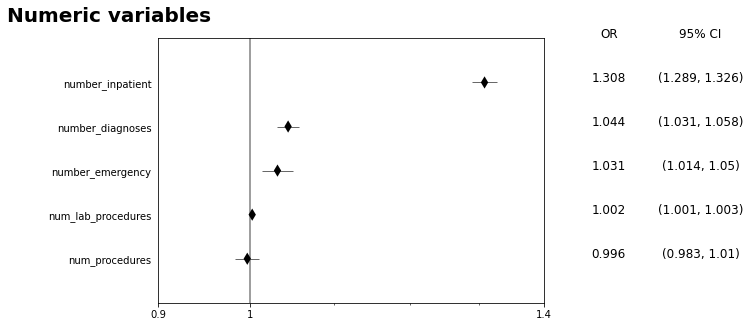

In [77]:
#Numberic plot

p_num = EffectMeasurePlot(label=num, effect_measure=or_array_num, lcl=lowCI_array_num, ucl=upCI_array_num )
p_num.labels(scale='log')
p_num.plot(figsize=(10,5), t_adjuster=0.1, max_value=1.4, min_value=0.9)
plt.suptitle("Numeric variables",x=0.1,y=0.9, fontsize = 20, weight = 'bold')
plt.tight_layout()
plt.rc('axes', labelsize=30)
plt.show()